### Verify CUDA is available for GPU

In [ ]:
import torch

if torch.cuda.is_available():
    print("CUDA is available.")
    device_id = torch.cuda.current_device()
    device_name = torch.cuda.get_device_name(device_id)
    print(f"CUDA device name: {device_name}")
else:
    print("CUDA is not available.")


CUDA is available.
CUDA device name: NVIDIA GeForce RTX 3070


### Download Data

The dataset used in this project is the **MNIST (Modified National Institute of Standards and Technology) dataset**, which contains **handwritten digits (0-9) in grayscale (28x28 pixels)**.

- The dataset is downloaded from **torchvision.datasets.MNIST**, a PyTorch utility that handles dataset retrieval.
- It is stored in a **binary IDX format**, rather than individual image files (e.g., PNG or JPG).
- The raw dataset is located in `data/MNIST/raw/` and consists of the following files:
    - `train-images-idx3-ubyte` → Training images
    - `train-labels-idx1-ubyte` → Training labels (digits 0-9)
    - `t10k-images-idx3-ubyte` → Test images
    - `t10k-labels-idx1-ubyte` → Test labels

To avoid unnecessary re-downloading, the script checks if these files already exist before downloading them.

In [6]:
import os
from torchvision import datasets, transforms
from PIL import Image

# Define the root data directory
data_root = "../data"

# Define expected MNIST data files
mnist_files = [
    "MNIST/raw/train-images-idx3-ubyte",
    "MNIST/raw/train-labels-idx1-ubyte",
    "MNIST/raw/t10k-images-idx3-ubyte",
    "MNIST/raw/t10k-labels-idx1-ubyte"
]

# Check if MNIST data exists
if all(os.path.exists(os.path.join(data_root, f)) for f in mnist_files):
    print("MNIST dataset already exists. Skipping download.")
else:
    print("Downloading MNIST dataset...")

# Define transformations (convert to tensor)
transform = transforms.Compose([transforms.ToTensor()])

# Load dataset
train_dataset = datasets.MNIST(root=data_root, train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root=data_root, train=False, download=True, transform=transform)

print(f"Train set size: {len(train_dataset)} images")
print(f"Test set size: {len(test_dataset)} images")

MNIST dataset already exists. Skipping download.
Train set size: 60000 images
Test set size: 10000 images


### Print a sample image

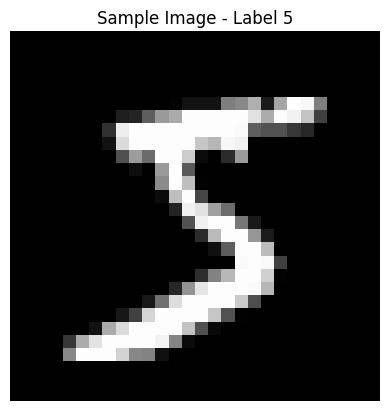

In [7]:
import matplotlib.pyplot as plt
from torchvision import transforms

# Get a single sample image and label
sample_img_tensor, label = train_dataset[0]

# Convert tensor to PIL image in memory
to_pil = transforms.ToPILImage()
sample_img_pil = to_pil(sample_img_tensor)

# Display the image
plt.imshow(sample_img_pil, cmap="gray")
plt.title(f"Sample Image - Label {label}")
plt.axis("off")
plt.show()